In [2]:
#!pip install wordcloud

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv("spam.csv",encoding='latin') #veri icersinde baska karakterler varsa encoding yaziyoruz

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [76]:
df.shape

(5572, 3)

In [9]:
df.drop(['Unnamed: 2',"Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.columns=["Class","Text"] #sutün isimleri degistir

In [12]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Cevabi spam mi ham mi, evet/hayir --> Classification --> rakama dönüstürmek lazim

In [16]:
df["Label"]=df["Class"].map({"ham":0,"spam":1})

In [15]:
df.head()

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


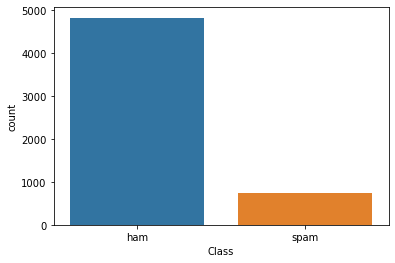

In [17]:
sns.countplot(x=df["Class"]);

In [21]:
df["Text"]=df["Text"].str.lower() # kücük harfe cevirdik
df["Text"]=df["Text"].str.replace('[^\w\s]','') # noktalama isaretlerini kaldirdik
df["Text"]=df["Text"].str.replace('\d+','') # rakamlari kaldirdik
df["Text"]=df["Text"].str.replace('\n',' ').replace('\r',' ') # enter ve return'lari kaldirdik

In [42]:
from wordcloud import STOPWORDS

In [43]:
# WorldCloud olusturan Funktion
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS) #gönderecegimiz color, ve stopwords sil
    wc.generate(' '.join(data)) #datanin icindeki satirlari birlestiriyor ve wc generieren ediyor
    plt.imshow(wc) #resim göster
    plt.axis("off") #x ve y'yi göstermemis oluyoruz

In [44]:
ham=df[df["Class"]=="ham"]["Text"] # sadece ham mesajlar

In [45]:
spam=df[df["Class"]=="spam"]["Text"] # sadece spam mesajlar

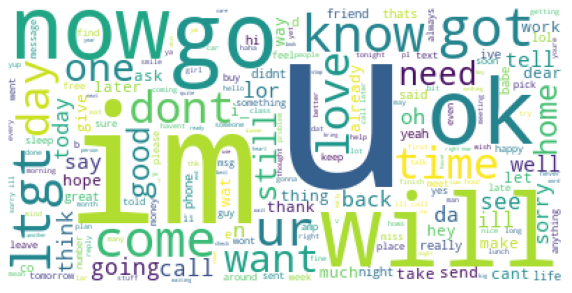

In [46]:
wc(ham,'white')

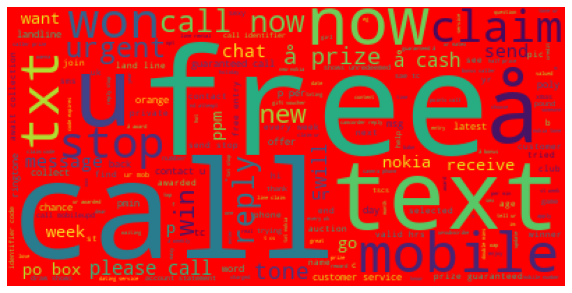

In [47]:
wc(spam,'red')

In [52]:
x=df["Text"]

In [53]:
y=df["Label"]

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [56]:
vect=CountVectorizer(stop_words="english")

In [57]:
x=vect.fit_transform(x)

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.15)

In [68]:
mb=MultinomialNB()

In [69]:
tahmin=mb.fit(x_train,y_train).predict(x_test)

In [70]:
accuracy_score(tahmin,y_test)

0.972488038277512

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
d=DecisionTreeClassifier()

In [73]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
tahmin2=d.predict(x_test)

In [75]:
accuracy_score(tahmin2,y_test)

0.9688995215311005

### WordCloud'u baska resimlere giyindirmek - MASK

In [77]:
from PIL import Image
import numpy as np

In [78]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("alice_mask.png"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask) 
    wc.generate(' '.join(data)) 
    plt.imshow(wc) 
    plt.axis("off")

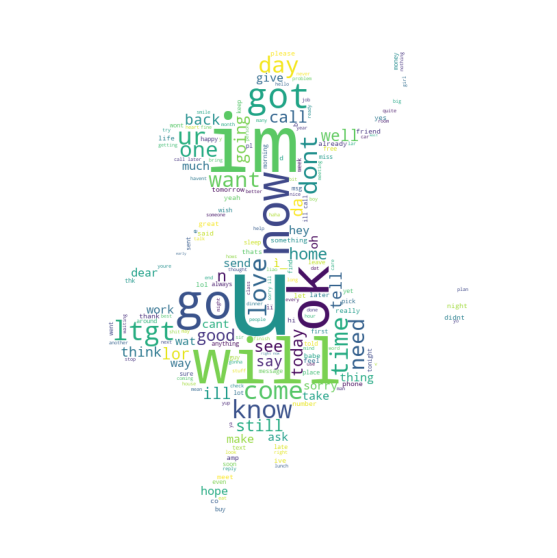

In [79]:
wc(ham,'white')

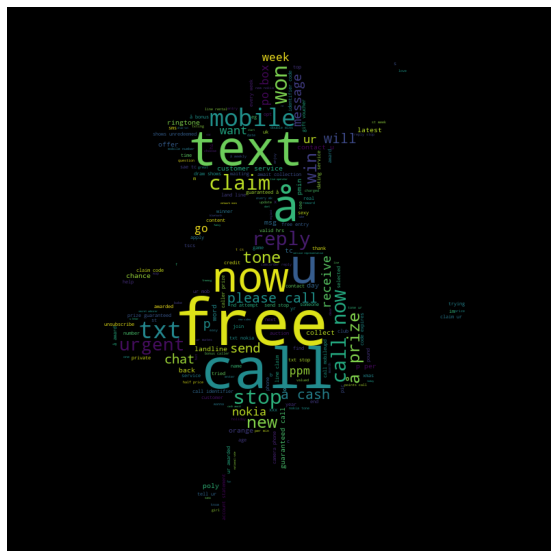

In [81]:
wc(spam,"black")